# Abalone Data 사용하여 머신러닝 분류하기

In [4]:
# 사용 모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [6]:
# csv 파일 불러오기
df = pd.read_csv("/Users/user/Downloads/abalone.csv", index_col = 0)

In [9]:
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

In [11]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [13]:
# 결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [15]:
# 결측치 제거
df = df.dropna()

In [17]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Whole weight'}>,
        <Axes: title={'center': 'Shucked weight'}>,
        <Axes: title={'center': 'Viscera weight'}>],
       [<Axes: title={'center': 'Shell weight'}>,
        <Axes: title={'center': 'Rings'}>, <Axes: >]], dtype=object)

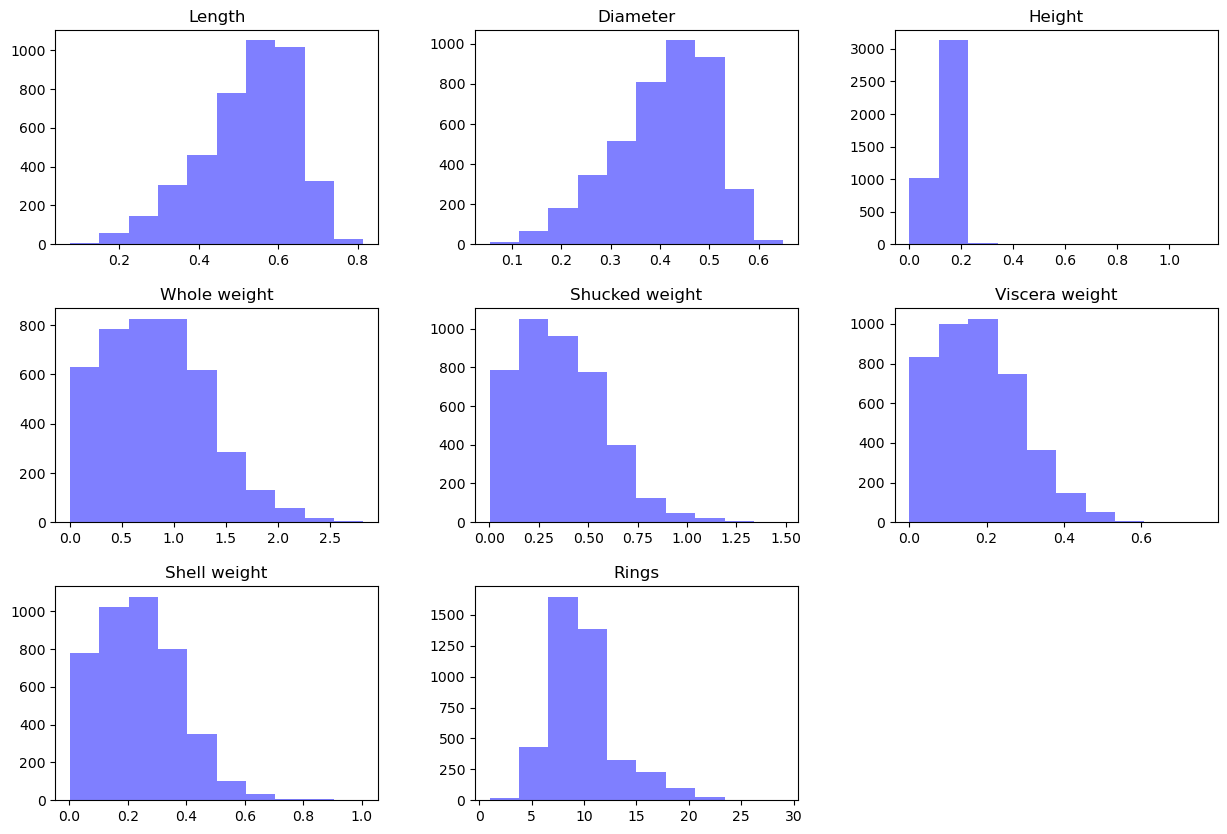

In [19]:
df.hist(figsize=(15, 10), grid=False, alpha=0.5, color='blue')

Text(0.5, 1.0, 'Abalone of Rings')

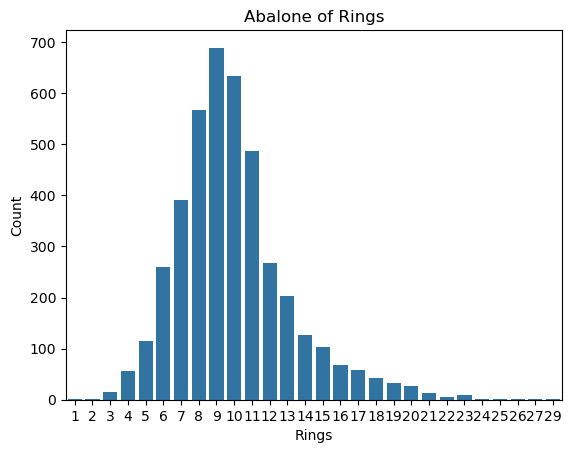

In [21]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Abalone of Rings")

Text(0.5, 1.0, 'Sex of Abalone')

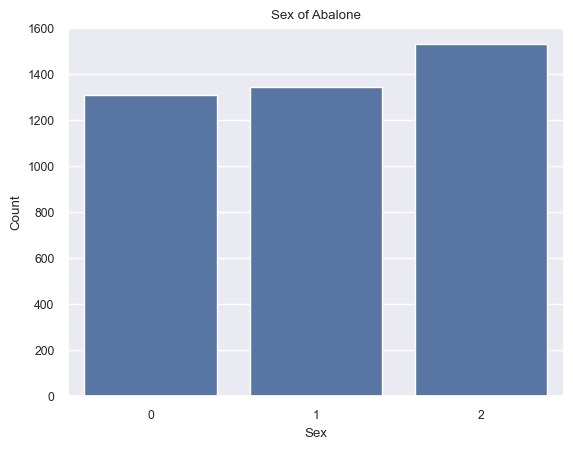

In [38]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Sex of Abalone")

In [23]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [40]:
import pandas as pd

# 기존 abalone 데이터셋 로드

# rings=1인 데이터와 rings=29인 데이터 추출
rings_1_data = df[df['Rings'] == 1].copy()
rings_29_data = df[df['Rings'] == 29].copy()

# rings=1인 데이터를 rings=0으로 변경
rings_1_data['Rings'] = 0

# rings=29인 데이터를 rings=28로 변경
rings_29_data['Rings'] = 28

# 기존 데이터에 rings=0과 rings=28 데이터를 추가
df = pd.concat([df, rings_1_data, rings_29_data], ignore_index=True)

# 추가된 데이터 확인
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
0       2
28      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

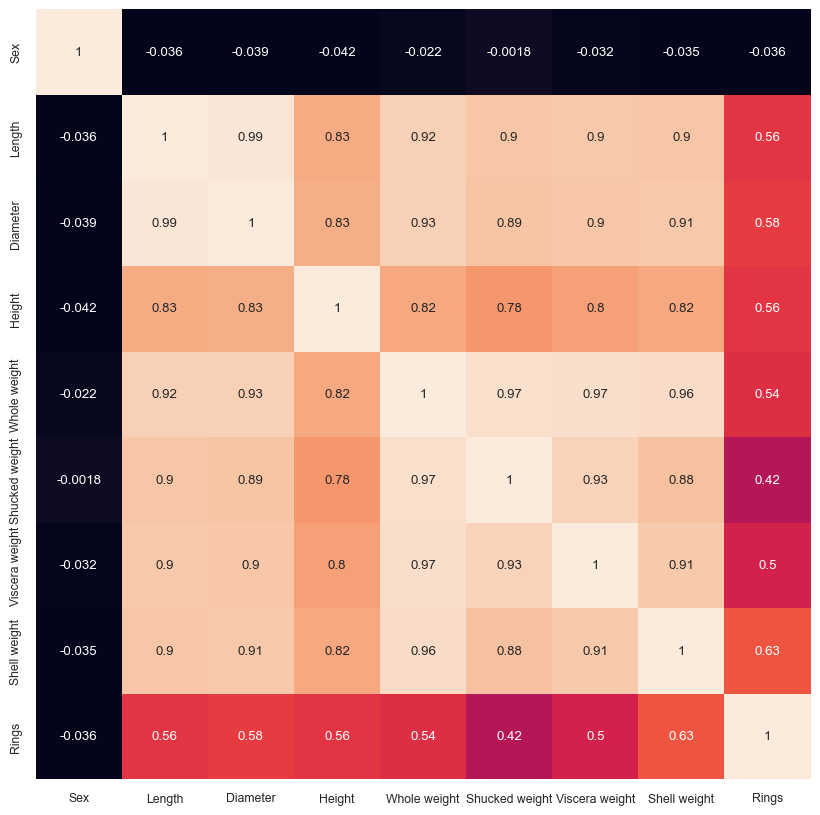

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 1. 데이터 로드 (이미 로드된 데이터가 있을 경우 생략 가능)
# df = pd.read_csv('abalone.csv')

# 2. 범주형 변수 'Sex'를 숫자로 변환 (Label Encoding)
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# 3. 상관 관계를 계산할 열들 선택
df_corr = df[['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']]

# 4. 상관관계 행렬 계산
df_corr = df_corr.corr()

# 5. 히트맵 그리기
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()


In [29]:
# Convert RingCount to Age by adding 1.5, accoring to codebook
df['Age'] = df['Rings'] + 1.5
# df.drop('Rings', axis=1, inplace=True)

Sex, Rings은 다른 특성들과의 상관관계가 특히 낮다.

Abalone 데이터에 따르면, Rings 값에 1.5를 더하면 전복의 나이가 된다고 한다.

## Train Test split

In [42]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [44]:
new_df = df.copy()

In [46]:
new_df['newRings_1'] = np.where(df['Rings'] <= 5, 1,0)
new_df['newRings_2'] = np.where(((df['Rings'] > 5) & (df['Rings'] <= 15)), 2,0)
new_df['newRings_3'] = np.where(df['Rings'] > 15, 3,0)

new_df['newRings'] = new_df['newRings_1'] + new_df['newRings_2'] + new_df['newRings_3']

In [48]:
X=df.drop(['Sex', 'Age', 'Rings'], axis=1)

X.head()
# head()는 첫 5행만 출력함.

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [50]:
X_new = new_df.drop(['Rings','Age','Sex', 'newRings', 'newRings_1','newRings_2','newRings_3'], axis = 1)
y_new = new_df['newRings']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.25, random_state=12)

X_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
3839,0.520,0.425,0.125,0.7900,0.3720,0.2050,0.1900
811,0.490,0.365,0.130,0.6835,0.1650,0.1315,0.2050
27,0.590,0.445,0.140,0.9310,0.3560,0.2340,0.2800
327,0.510,0.400,0.130,0.6435,0.2700,0.1665,0.2050
1018,0.630,0.480,0.150,1.1785,0.5185,0.2480,0.3235
...,...,...,...,...,...,...,...
3916,0.520,0.410,0.160,0.7120,0.2845,0.1530,0.2250
1283,0.500,0.375,0.145,0.5795,0.2390,0.1375,0.1850
3714,0.725,0.560,0.185,1.7920,0.8730,0.3670,0.4350
3325,0.345,0.265,0.090,0.1630,0.0615,0.0370,0.0485


### SVM

In [57]:
# SVC 모델 학습
rg_svc = SVC() # Support Vector Classifier
rg_svc.fit(X_train, y_train) # X_train(학습데이터)과 y_train(레이블)으로 학습

print('--- SVC 모델점수 (R²) ---\n', '{:.5f}'.format(rg_svc.score(X_test, y_test)))

pred_svc = rg_svc.predict(X_test)

ac_score = accuracy_score(pred_svc, y_test)
cf_matrix = confusion_matrix(pred_svc, y_test)
print('\n--- accuracy score ---')
print('{:.5f}'.format(ac_score))
print('\n--- confusion matrix ---')
print(cf_matrix)

--- SVC 모델점수 (R²) ---
 0.91300

--- accuracy score ---
0.91300

--- confusion matrix ---
[[ 28   3   0]
 [ 22 927  66]
 [  0   0   0]]


### Logistic Regression

In [60]:
cl_lr = LogisticRegression()
cl_lr.fit(X_train, y_train)

print('--- LR 모델점수 ---\n', '{:.5f}'.format(cl_lr.score(X_test, y_test)))

pred_lr = cl_lr.predict(X_test)

ac_score = accuracy_score(pred_lr, y_test)
cf_matrix = confusion_matrix(pred_lr, y_test)
print('\n--- accuracy score ---')
print('{:.5f}'.format(ac_score))
print('\n--- confusion matrix ---')
print(cf_matrix)

--- LR 모델점수 ---
 0.91205

--- accuracy score ---
0.91205

--- confusion matrix ---
[[ 24   3   0]
 [ 26 921  57]
 [  0   6   9]]


### Random Forest

In [63]:
cl_rf = RandomForestClassifier(random_state=5)
cl_rf.fit(X_train, y_train)

print('--- RF 모델점수 ---\n', '{:.5f}'.format(cl_rf.score(X_test, y_test)))

pred_rf = cl_rf.predict(X_test)

ac_score = accuracy_score(pred_rf, y_test)
cf_matrix = confusion_matrix(pred_rf, y_test)
print('\n--- accuracy score ---')
print('{:.5f}'.format(ac_score))
print('\n--- confusion matrix ---')
print(cf_matrix)

--- RF 모델점수 ---
 0.90535

--- accuracy score ---
0.90535

--- confusion matrix ---
[[ 30  13   0]
 [ 20 905  54]
 [  0  12  12]]
